In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('radiator_final_faults.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,AmbientTemperature[°C],CoolantTemperature[°C],CoolantLevel[%],CoolantFlowRate[L/min],ThermostatOpening[%],FanSpeed[RPM],VehicleSpeed[km/h],RadiatorPressure[PSI],RadiatorAge[Years],RadiatorPerformance
0,20.059824,98.634720,85.779400,51.659119,74.257732,1517.673481,82.481842,12.637049,7.443563,97.151834
1,27.181936,82.757482,57.573722,37.677554,45.782948,2110.174098,76.318303,11.500656,3.869267,66.094402
2,26.759846,101.317775,74.653498,46.298031,70.818358,1612.778822,85.194111,10.473473,3.989034,90.958379
3,28.163824,89.734631,71.897612,35.514693,62.402315,1416.824849,76.824236,15.923984,5.422655,74.642433
4,25.338692,98.731042,82.933498,43.438282,69.153800,1401.745412,117.797433,10.573393,7.479152,99.978033


In [4]:
df.tail()

,AmbientTemperature[°C],CoolantTemperature[°C],CoolantLevel[%],CoolantFlowRate[L/min],ThermostatOpening[%],FanSpeed[RPM],VehicleSpeed[km/h],RadiatorPressure[PSI],RadiatorAge[Years],RadiatorPerformance
219995,28.593135,86.047503,54.849440,18.082573,37.808057,2179.668455,46.256133,14.418616,2.318406,54.251402
219996,20.274523,93.703739,62.938357,41.216237,55.861536,1263.551435,93.644135,10.674823,5.915618,80.243106
219997,28.814560,88.342472,61.494641,31.979847,44.859481,1248.696131,75.477159,13.992755,4.070913,68.704067
219998,18.036388,95.247757,70.364071,41.172924,58.349746,1647.085337,100.495394,7.736239,4.833043,93.297079
219999,25.360930,84.024277,55.865728,25.865245,41.261361,2139.976904,28.555016,14.402963,3.010471,51.887264


In [5]:
df.shape

(220000, 10)

In [6]:
df.isnull().sum()

AmbientTemperature[°C]    0
CoolantTemperature[°C]    0
CoolantLevel[%]           0
CoolantFlowRate[L/min]    0
ThermostatOpening[%]      0
FanSpeed[RPM]             0
VehicleSpeed[km/h]        0
RadiatorPressure[PSI]     0
RadiatorAge[Years]        0
RadiatorPerformance       0
dtype: int64

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

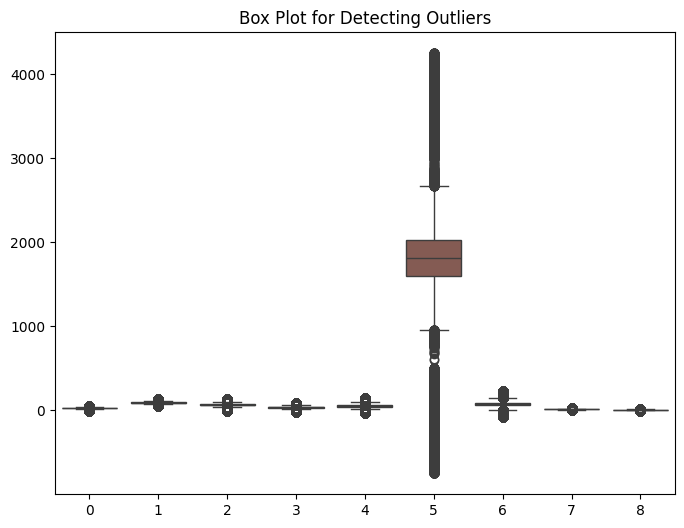

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=X)
plt.title('Box Plot for Detecting Outliers')
plt.show()

In [9]:
Q1 = np.percentile(X, 25, axis = 0)
Q3 = np.percentile(X, 75, axis = 0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = (X >= lower_bound) & (X <= upper_bound)
filtered_indices = np.all(mask, axis=1)

X_filtered = X[filtered_indices]
y_filtered = y[filtered_indices]

print('Outliers removed. New Dataset shape: ', X_filtered.shape)

Outliers removed. New Dataset shape:  (198489, 9)


In [10]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
xgb_model = XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, learning_rate = 0.05,
                         max_depth = 6, subsample = 0.8, colsample_bytree = 0.8, random_state = 42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [13]:
y_pred = xgb_model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE): ', mse)
print('Mean Absolute Error (MAE): ', mae)
print('R-Squared (R2): ', r2)

Mean Squared Error (MSE):  13.14499704577012
Mean Absolute Error (MAE):  2.8680233109577675
R-Squared (R2):  0.9367337885707855


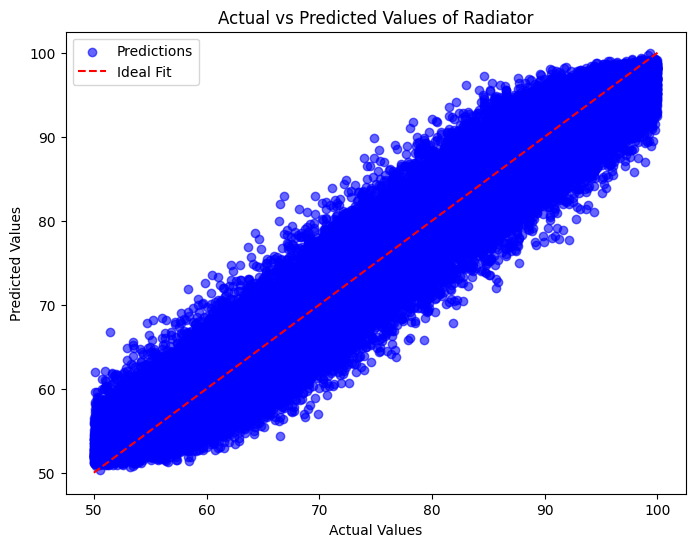

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.6, label = 'Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle = '--', label = 'Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values of Radiator')
plt.legend()
plt.show()

Correlation with target:
                         RadiatorPerformance
AmbientTemperature[°C]            -0.082007
CoolantTemperature[°C]             0.283100
CoolantLevel[%]                    0.285782
CoolantFlowRate[L/min]             0.280886
ThermostatOpening[%]               0.266864
FanSpeed[RPM]                     -0.073961
VehicleSpeed[km/h]                 0.260290
RadiatorPressure[PSI]             -0.089797
RadiatorAge[Years]                 0.255106


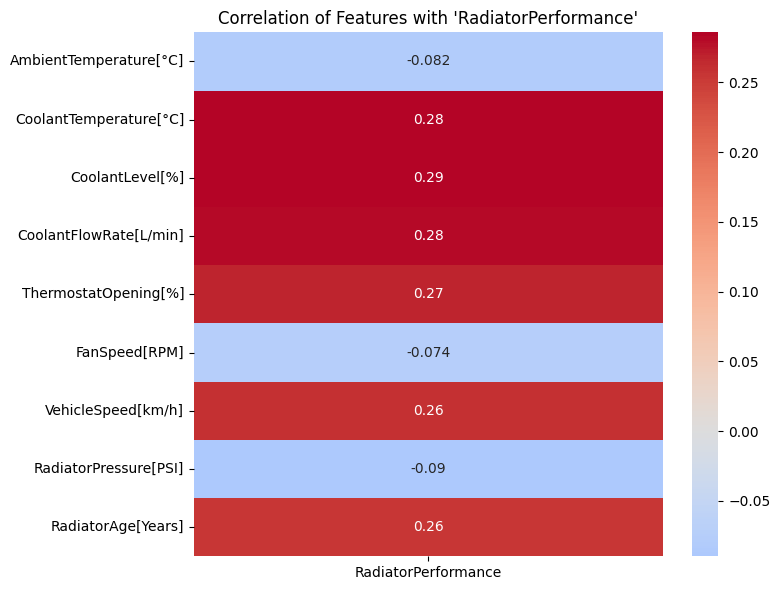

In [16]:
corr_matrix = df.corr(numeric_only=True)

target = "RadiatorPerformance" 
target_corr = corr_matrix[[target]].drop(target)
print("Correlation with target:\n", target_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap="coolwarm", center=0)
plt.title(f"Correlation of Features with '{target}'")
plt.tight_layout()
plt.show()